In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('boston.csv')
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [3]:
# X = all features except target
X = data.drop('MEDV', axis=1)

# y = target (house price)
y = data['MEDV']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()

# Fit only on training data
X_train = scaler.fit_transform(X_train)

# Use the same transformation on test data
X_test = scaler.transform(X_test)


In [9]:
from keras import Input
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Input layer first
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear output for regression

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 588.7161 - mae: 22.4606 - val_loss: 546.1617 - val_mae: 21.8030
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 591.9465 - mae: 22.4038 - val_loss: 513.2133 - val_mae: 21.0600
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 531.7708 - mae: 21.2685 - val_loss: 478.6625 - val_mae: 20.2384
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 535.9617 - mae: 21.0082 - val_loss: 435.7359 - val_mae: 19.1686
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 455.2169 - mae: 19.2033 - val_loss: 378.9195 - val_mae: 17.6713
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 391.4007 - mae: 17.6500 - val_loss: 309.5479 - val_mae: 15.7504
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 307.9088 - mae: 15.4552 - val_loss: 234.9109 - val_mae: 13.4327
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 250.0579 - mae: 13.4731 - val_loss: 163.9158 - val_mae: 10.7945
Epoch 9/

In [12]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.3063 - mae: 2.1930
Test Mean Absolute Error: 2.3026583194732666


In [13]:
predictions = model.predict(X_test)
print(predictions[:5])  # Show first 5 predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 
[[28.173744]
 [34.810627]
 [19.436867]
 [27.211983]
 [15.468636]]


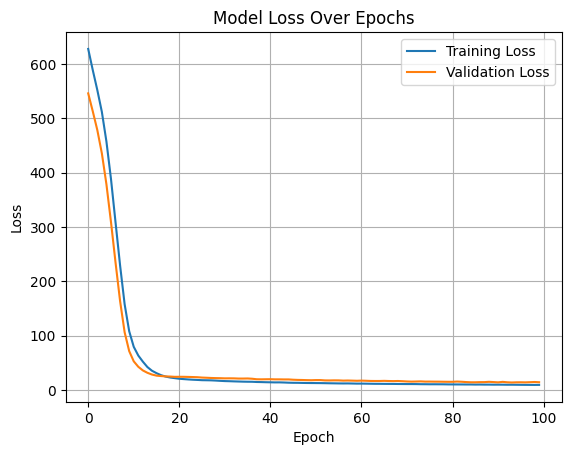

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()